In [36]:
from stable_baselines3 import PPO
import gymnasium
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [28]:
env = gymnasium.make("CartPole-v1", render_mode="rgb_array")
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [29]:
model = PPO("MlpPolicy", env, verbose=1)
model

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [30]:
model.learn(total_timesteps=10000)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19.9     |
|    ep_rew_mean     | 19.9     |
| time/              |          |
|    fps             | 2171     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.1        |
|    ep_rew_mean          | 26.1        |
| time/                   |             |
|    fps                  | 1599        |
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010493459 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explained_variance   | -0.00381    |
|    learning_rate        | 0.

In [41]:
obs, _i = env.reset()  # Unpack the observation and additional info

frames = [] # List to store for gif
rewards_per_step = []  # List to store rewards
actions_per_step = []  # List to store actions

for i in range(1000):
    action, _states = model.predict(obs)  # Ensure only obs is passed here
    step_results = env.step(action)
    obs, reward, done, truncated, r_info = step_results
    print(step_results)
    frame = env.render()
    frames.append(frame)
    rewards_per_step.append(reward)
    actions_per_step.append(action)
    if done:
        obs, info = env.reset()  # Unpack again when resetting the environment
env.close()


(array([ 0.03537455,  0.18176882, -0.0280541 , -0.3244489 ], dtype=float32), 1.0, False, False, {})
(array([ 0.03900993, -0.01294267, -0.03454308, -0.04074342], dtype=float32), 1.0, False, False, {})
(array([ 0.03875107, -0.20755269, -0.03535795,  0.24084382], dtype=float32), 1.0, False, False, {})
(array([ 0.03460002, -0.40215218, -0.03054107,  0.52216756], dtype=float32), 1.0, False, False, {})
(array([ 0.02655698, -0.20661397, -0.02009772,  0.22001933], dtype=float32), 1.0, False, False, {})
(array([ 0.0224247 , -0.01121059, -0.01569733, -0.07893489], dtype=float32), 1.0, False, False, {})
(array([ 0.02220049,  0.18413283, -0.01727603, -0.37652874], dtype=float32), 1.0, False, False, {})
(array([ 0.02588314, -0.01073954, -0.02480661, -0.08934271], dtype=float32), 1.0, False, False, {})
(array([ 0.02566835,  0.18472904, -0.02659346, -0.38974777], dtype=float32), 1.0, False, False, {})
(array([ 0.02936293, -0.01000557, -0.03438842, -0.10556669], dtype=float32), 1.0, False, False, {})


In [33]:
images = [Image.fromarray(frame) for frame in frames]

# Save as a GIF
images[0].save("cartpole.gif", save_all=True, append_images=images[1:], duration=50, loop=0)

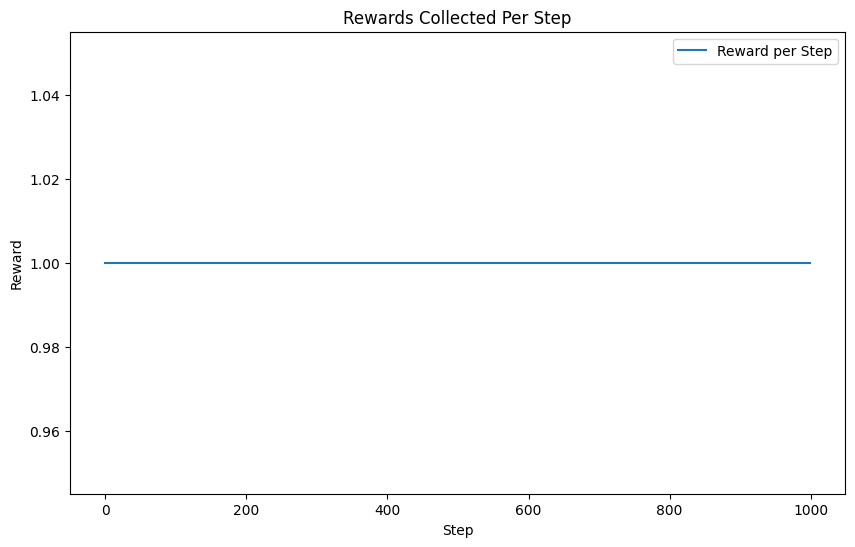

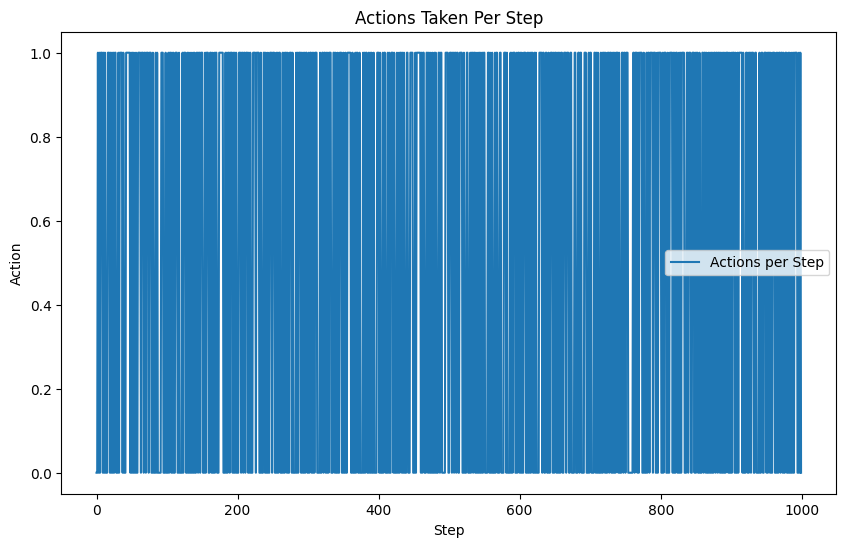

In [35]:
# Plot rewards per step
plt.figure(figsize=(10, 6))
plt.plot(rewards_per_step, label='Reward per Step')
plt.xlabel('Step')
plt.ylabel('Reward')
plt.title('Rewards Collected Per Step')
plt.legend()
plt.show()

# Plot actions per step (optional)
plt.figure(figsize=(10, 6))
plt.plot(actions_per_step, label='Actions per Step')
plt.xlabel('Step')
plt.ylabel('Action')
plt.title('Actions Taken Per Step')
plt.legend()
plt.show()

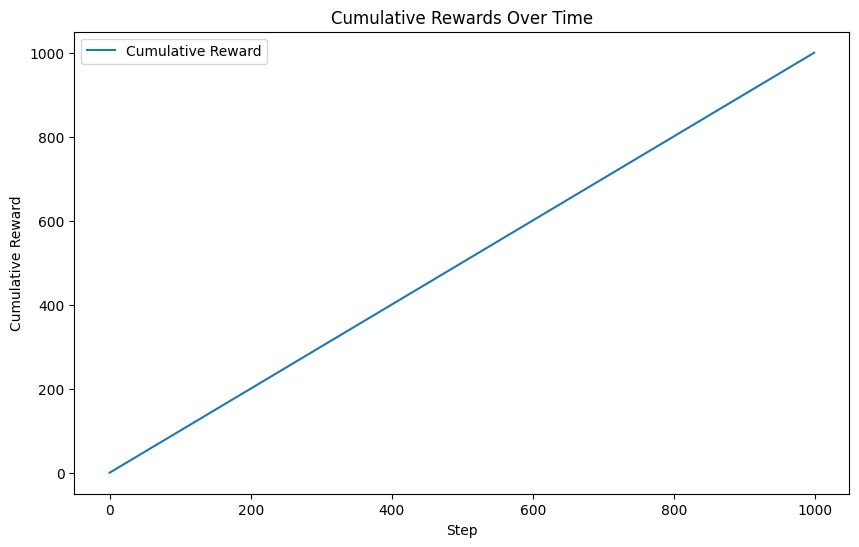

In [37]:
# Calculate cumulative rewards
cumulative_rewards = np.cumsum(rewards_per_step)

# Plot cumulative rewards
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label='Cumulative Reward')
plt.xlabel('Step')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards Over Time')
plt.legend()
plt.show()